<a href="https://colab.research.google.com/github/MayarQasrawi/Artificial-Intelligent/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libreries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load Data


In [3]:

file_path = '/content/drive/MyDrive/Datasets/TG_T_CashValues_Rel.xlsx'
df = pd.read_excel(file_path)
print(df)

      Gender  Age  Dur        PPV
0       Male    0   20  15.198437
1       Male    0   21  15.741015
2       Male    0   22  16.267189
3       Male    0   23  16.777448
4       Male    0   24  17.272269
...      ...  ...  ...        ...
5265  Female   78    2   1.925421
5266  Female   78    3   2.777638
5267  Female   79    1   1.000000
5268  Female   79    2   1.920897
5269  Female   80    1   1.000000

[5270 rows x 4 columns]


### ⚡ PPV stands for Pay-Per-View


# Data exploritery

In [4]:
df.head()

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


In [5]:
df.describe()

,Age,Dur,PPV
count,5270.000000,5270.000000,5270.000000
mean,31.294118,22.882353,14.858158
std,18.671548,13.793388,7.025862
min,0.000000,1.000000,1.000000
25%,16.000000,11.000000,9.374980
50%,30.000000,22.000000,15.703883
75%,45.000000,34.000000,20.953996
max,80.000000,50.000000,26.024118


In [6]:
df.columns

Index(['Gender', 'Age', 'Dur', 'PPV'], dtype='object')

In [7]:
df.shape

(5270, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5270 non-null   object 
 1   Age     5270 non-null   int64  
 2   Dur     5270 non-null   int64  
 3   PPV     5270 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 164.8+ KB


# Data Cleaning
There is no missing value in the data set to be handle

# Feature Extraction


In [9]:
correlation_matrix = df[['Age','PPV','Dur']].corr()
print(correlation_matrix)

          Age       PPV       Dur
Age  1.000000 -0.565087 -0.507243
PPV -0.565087  1.000000  0.978774
Dur -0.507243  0.978774  1.000000


## 🗒 Note:
**Dur** has the highest correlation coefficient (0.978774) with PPV. This indicates a very strong positive linear relationship between the two variables.

While **Age** also shows a negative correlation with PPV (-0.565087), the correlation is weaker compared to Dur.

In [10]:
import seaborn as sns

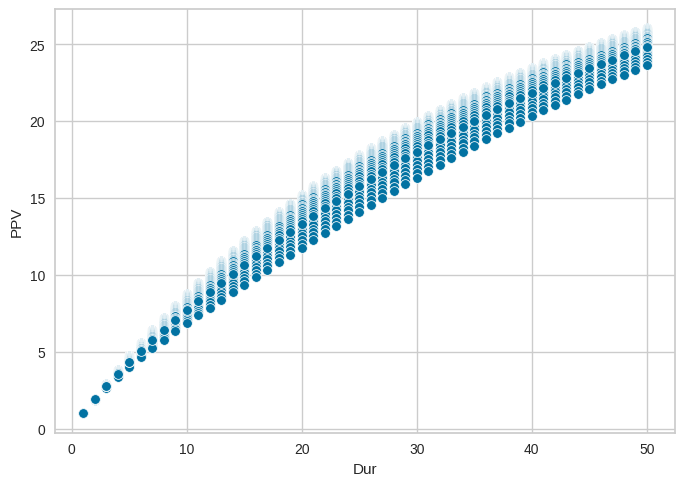

In [11]:
sns.scatterplot(x="Dur", y="PPV", data=df);

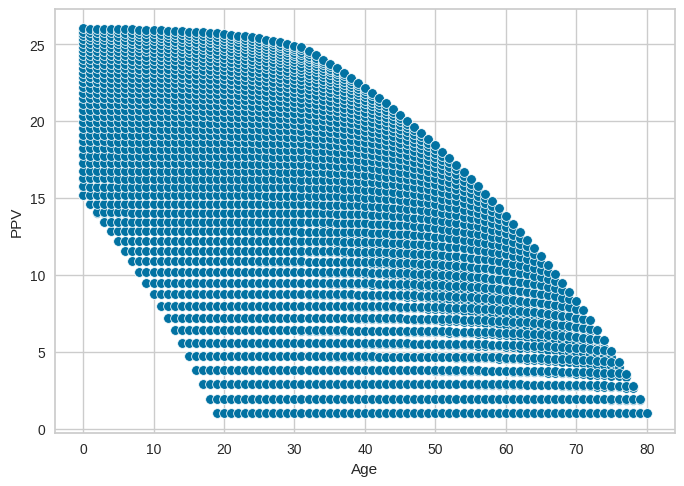

In [12]:
sns.scatterplot(x="Age", y="PPV", data=df);

# Spliting the Data

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [14]:
# Reshape x to be 2-dimensional using reshape()
x=df['Dur'].values.reshape(-1, 1)
# Or, select the column as a DataFrame using double brackets
# x = df[['Dur']]
y=df['PPV']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)

In [16]:
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 3952 samples.
Testing set has 1318 samples.


# Build the Model


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print("Coefficients:", regr.coef_)
print("-" * 30)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("-" * 30)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: [0.49840806]
------------------------------
Mean squared error: 2.05
------------------------------
Coefficient of determination: 0.96


In [18]:
prediction = regr.predict(x_test[[0]])
prediction

array([4.43653938])

In [19]:
y_test.iloc[0]

1.96891174757282

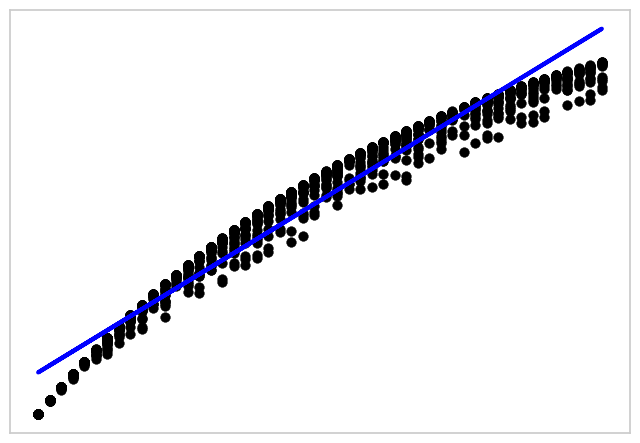

In [20]:
# Assuming 'Dur' is the most relevant feature for the scatter plot,
# which is what you used for x during training:
plt.scatter(x_test[:, 0], y_test, color="black")  # Access the 'Dur' values directly

# The rest of the code remains the same:
plt.plot(x_test[:, 0], y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [21]:
from sklearn.tree import DecisionTreeRegressor

x= df.drop(['PPV','Gender'], axis=1)
y= df['PPV']
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)
model2 = DecisionTreeRegressor()

# Train the model using the training sets
model2.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = model2.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("-" * 30)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.21
------------------------------
Coefficient of determination: 1.00


In [22]:
prediction = model2.predict(x_test.iloc[[0]])
prediction

array([1.96690398])

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


x = df.drop('PPV', axis=1)
y = df['PPV']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse_output=False for non-sparse matrix

# Fit and transform the encoder on the 'Gender' column
encoded_gender = encoder.fit_transform(x[['Gender']])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(['Gender'])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_gender, columns=encoded_feature_names, index=x.index)

# Drop the original 'Gender' column and concatenate the encoded features
x = x.drop('Gender', axis=1)
x = pd.concat([x, encoded_df], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("-" * 30)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.01
------------------------------
Coefficient of determination: 1.00


In [24]:
prediction = model2.predict(x_test.iloc[[0]])
prediction

array([1.96908019])

In [25]:
y_test.iloc[0]

1.96891174757282

In [26]:
!pip install pycaret

In [27]:
from pycaret.regression import *

def predict_ppv(data):
  """
  Predicts PPV values using PyCaret.

  Args:
    data: Pandas DataFrame containing columns: Gender, Age, Dur, PPV

  Returns:
    Trained PyCaret model and predictions.
  """

  # 1. Data Setup
  # Remove ignore_features=['PPV'] as it's handled internally
  exp = setup(data, target='PPV',
              numeric_features=['Age', 'Dur'],  # Specify numeric features
              categorical_features=['Gender'],
              session_id=123)  # For reproducibility

  # 2. Model Selection (Example: Light Gradient Boosting Machine)
  # Choose a suitable model based on the dataset characteristics and evaluation metrics.
  # LightGBM often performs well for regression tasks.
  best_model = compare_models(sort='MAE')

  # 3. Model Tuning (Optional)
  # Tune hyperparameters for better performance
  tuned_model = tune_model(best_model)

  # 4. Finalize Model
  final_model = finalize_model(tuned_model)

  # 5. Make Predictions
  predictions = predict_model(final_model, data)

  return final_model, predictions

# Example Usage:
# Assuming you have your data in a pandas DataFrame named 'df'
model, predictions = predict_ppv(df)

# Evaluate Performance
print(model)
# Change 'Label' to 'prediction_label' to access the predicted values
print(predictions[['PPV', 'prediction_label']])  # Actual PPV vs. Predicted PPV

# Calculate Metrics (example: MAE)
# Remove the metrics argument. evaluate_model will return R2 by default for regression
mae = evaluate_model(model)
print(f"R2: {mae}") # Print R2

,Description,Value
0,Session id,123
1,Target,PPV
2,Target type,Regression
3,Original data shape,"(5270, 4)"
4,Transformed data shape,"(5270, 4)"
5,Transformed train set shape,"(3688, 4)"
6,Transformed test set shape,"(1582, 4)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0107,0.0010,0.0308,1.0000,0.0024,0.0008,0.6850
xgboost,Extreme Gradient Boosting,0.0321,0.0035,0.0589,0.9999,0.0040,0.0024,0.0980
lightgbm,Light Gradient Boosting Machine,0.0346,0.0046,0.0672,0.9999,0.0048,0.0028,0.1370
rf,Random Forest Regressor,0.0376,0.0048,0.0682,0.9999,0.0054,0.0029,0.4620
dt,Decision Tree Regressor,0.0551,0.0108,0.1036,0.9998,0.0070,0.0038,0.0460
gbr,Gradient Boosting Regressor,0.0770,0.0168,0.1289,0.9997,0.0115,0.0080,0.1680
knn,K Neighbors Regressor,0.1797,0.0621,0.2489,0.9987,0.0407,0.0272,0.0940
ada,AdaBoost Regressor,0.5473,0.4276,0.6534,0.9912,0.0939,0.0750,0.1600
huber,Huber Regressor,1.0685,1.7668,1.3279,0.9637,0.2069,0.1936,0.1030
ridge,Ridge Regression,1.0941,1.7246,1.3124,0.9646,0.1946,0.1824,0.0880


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4115,0.3440,0.5865,0.9933,0.0589,0.0442
1,0.4319,0.3606,0.6005,0.9926,0.0632,0.0471
2,0.4800,0.4815,0.6939,0.9906,0.0760,0.0595
3,0.4177,0.3111,0.5578,0.9929,0.0617,0.0464
4,0.3876,0.2875,0.5362,0.9939,0.0685,0.0519
5,0.4259,0.3998,0.6323,0.9918,0.0602,0.0446
6,0.4205,0.3652,0.6043,0.9928,0.0612,0.0462
7,0.4373,0.4019,0.6340,0.9916,0.0663,0.0506
8,0.4742,0.4560,0.6753,0.9909,0.0791,0.0632


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Age', 'Dur'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}]))),
                (

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

R2: None
